# **РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ**

## ***Факультет физико-математических и естественных наук***

## **Отчет по лабораторной работе "Нелинейная регрессия"**

---



### **Студент** : Озьяс Стев Икнэль Дани   ------  **Группа** : НКНбд-01-21



**Вариант 17**

1. Набор данных: wine_quality

2. Независимые признаки: features/density, features/total sulfur dioxide

3. Метка класса: quality

4. Показатель бинарной классификации: 𝑇𝑃 (True Positives) – число корректно спрогнозированных точек в положительном классе

5. Параметры нейронных сетей:

- Кол-во скрытых слоев: 4

- Кол-во нейронов в слое: 64

- Оптимизаторы: Adagrad, Adamax, SGD

- Функция активации в скрытых слоях: selu



In [ ]:
# Добавляем библиотеки, которыми мы воспользуемся в дальнейшем:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve
from mpl_toolkits.mplot3d import Axes3D

## **Задание 1**

Импортируем **tensorflow** и считаем из него набор данных **wine_quality**:

In [ ]:
ds = tfds.load("wine_quality", split='train')
df = tfds.as_dataframe(ds)
df.sample(5)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/wine_quality/white/incomplete.TVL7U7_1.0.0/wine_quality-train.tfrecord*...…

Dataset wine_quality downloaded and prepared to /root/tensorflow_datasets/wine_quality/white/1.0.0. Subsequent calls will reuse this data.


,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
1821,10.2,0.042,0.34,0.99340,8.3,7.0,3.47,1.1,0.40,47.0,0.14,6
279,9.1,0.133,0.58,0.99320,6.6,52.0,3.10,1.1,0.30,136.0,0.22,5
4281,11.9,0.041,0.36,0.99002,5.7,38.0,3.27,1.8,0.98,90.0,0.28,7
3300,9.9,0.055,0.46,0.99680,7.6,58.0,3.14,10.2,0.43,135.0,0.18,6
3306,12.0,0.031,0.31,0.99260,6.7,20.0,3.36,4.9,0.82,151.0,0.31,7


Оставим в наборе данных только признаки, принимающие непрепрывные числовые значения, включая два независимых признака **`features/density`** и **`features/total sulfur dioxide`** и метку классов **`quality`**,  убрав из названий признаков строку `features/`:

In [ ]:
for col in list(df.columns):
  if type(df[col][0]) is bytes:
    df.drop(columns=col,inplace=True)

df2 = df[['features/density','features/total sulfur dioxide','quality']]
df2.columns = ['density','total sulfur dioxide','quality']

df2.head()

,density,total sulfur dioxide,quality
0,1.00080,197.0,5
1,0.99110,92.0,6
2,0.99076,51.0,4
3,0.99672,103.0,6
4,0.99016,135.0,6


## **Задача 2**

Сначала стандардизируем признак 'density' и 'total sulfur dioxide'

In [ ]:
x1 = df2['density']

x2 = df2['total sulfur dioxide']


x1 = (x1 - np.mean(x1))/np.std(x1)

x2 = (x2 - np.mean(x2))/np.std(x2)


df2['density'] = x1
df2['total sulfur dioxide'] = x2



/tmp/ipython-input-1149886481.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['density'] = x1
/tmp/ipython-input-1149886481.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total sulfur dioxide'] = x2


Визуализируем точки набора данных на плоскости с координатами, соответствующими двум независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.

Text(0, 0.5, 'total sulfur dioxide')

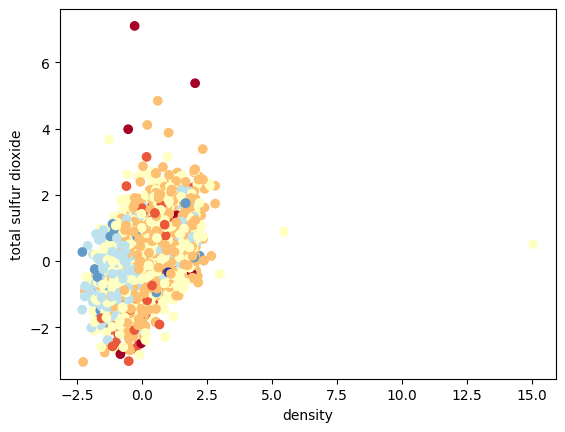

In [ ]:
plt.scatter(df2['density'], df2['total sulfur dioxide'], c = df2['quality'], cmap = plt.cm.RdYlBu)
plt.xlabel('density')
plt.ylabel('total sulfur dioxide')

Показываем все классы отдельно

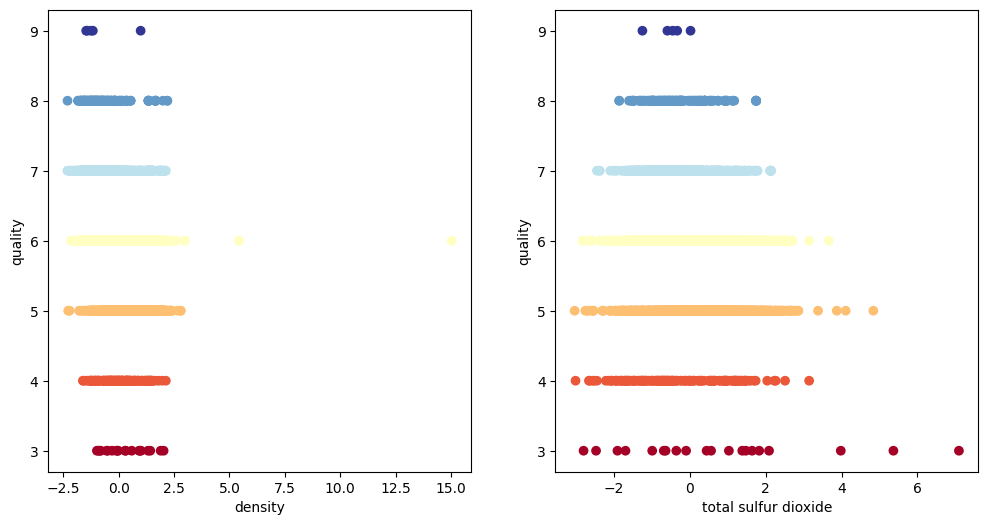

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Построим первую точечную диаграмму(для V0)
ax1.scatter(df2['density'], df2['quality'], c=df2['quality'], cmap=plt.cm.RdYlBu)
ax1.set_xlabel('density')
ax1.set_ylabel('quality')

# Построим вторую точечную диаграмму(для V2)
ax2.scatter(df2['total sulfur dioxide'], df2['quality'], c=df2['quality'], cmap=plt.cm.RdYlBu)
ax2.set_xlabel('total sulfur dioxide')
ax2.set_ylabel('quality')

plt.show()

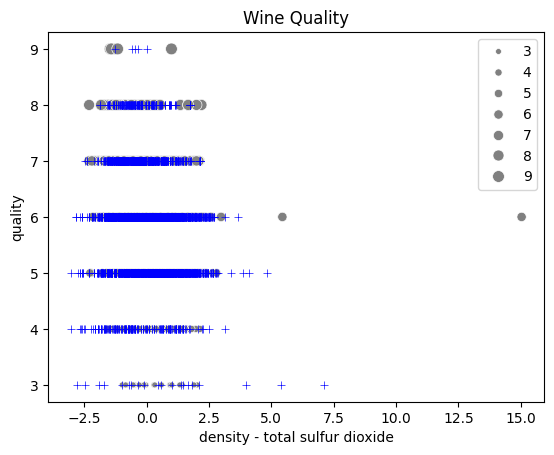

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(data=df2, x='density', y='quality', color='gray', size='quality')
sns.scatterplot(data=df2, x='total sulfur dioxide', y='quality', color='blue', marker='+')
plt.xlabel('density - total sulfur dioxide')
plt.ylabel('quality')
plt.title('Wine Quality')
plt.show()

## **Задание 3**

Наш признак с метками классов содержит **7 классов**, объединим некоторые классы, чтобы получить набор для бинарной классификации. Объединяйте классы таким образом, чтобы положительный и отрицательный классы были сопоставимы по количеству точек.

Объявим винами высшего качества вина с индексом качестве более или равным 6:

In [ ]:
df2['top quality'] = [1 if quality >= 6 else 0 for quality in df2['quality']]
df2.drop('quality', axis=1, inplace=True)

df2.head()

/tmp/ipython-input-810173290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['top quality'] = [1 if quality >= 6 else 0 for quality in df2['quality']]
/tmp/ipython-input-810173290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('quality', axis=1, inplace=True)


,density,total sulfur dioxide,top quality
0,2.264640,1.379953,0
1,-0.978854,-1.091000,1
2,-1.092538,-2.055849,0
3,0.900367,-0.832139,1
4,-1.293180,-0.079086,1


Видно что теперь у нас только **2 класса**

Text(0, 0.5, 'total sulfur dioxide')

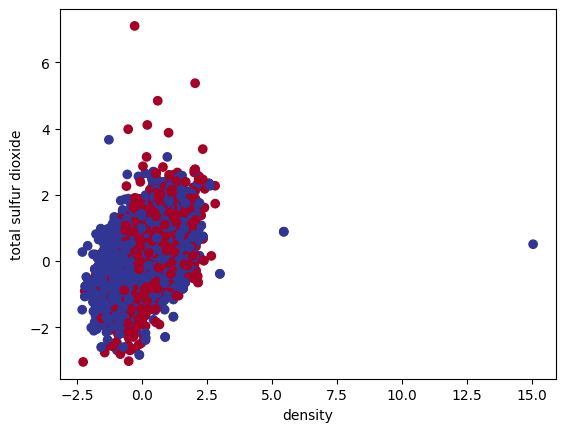

In [ ]:
plt.scatter(df2['density'], df2['total sulfur dioxide'], c = df2['top quality'], cmap = plt.cm.RdYlBu)
plt.xlabel('density')
plt.ylabel('total sulfur dioxide')

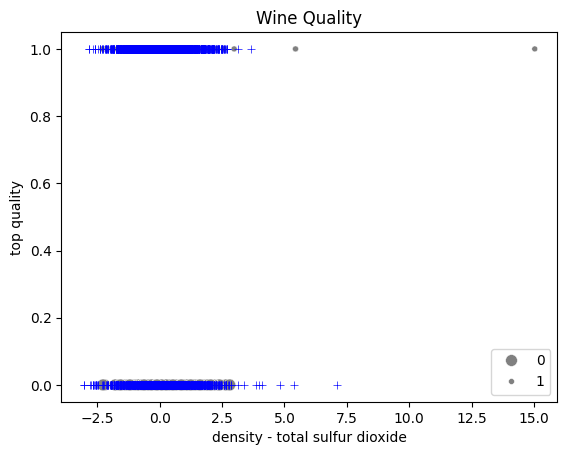

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(data=df2, x='density', y='top quality', color='gray', size='top quality')
sns.scatterplot(data=df2, x='total sulfur dioxide', y='top quality', color='blue', marker='+')
plt.xlabel('density - total sulfur dioxide')
plt.ylabel('top quality')
plt.title('Wine Quality')
plt.show()

In [ ]:
C = np.array(df2)
shape = C.shape

C1 = []      #Положительный класс
C2 = []      #Отрицательный класс

for i in range(shape[0]):
    if C[i][shape[1] -1 ] == 1:
      C1.append(C[i])
    else:
      C2.append(C[i])

C1 = np.array(C1)
C2 = np.array(C2)

C.shape, C1.shape, C2.shape

((4898, 3), (3258, 3), (1640, 3))

Делаем так, чтобы **положительный (quality >= 6) класс C1** и **отрицательный (quality < 6) класс C2** были сопоставимы по количеству точек.

In [ ]:
C1 = C1[np.random.choice(len(C1), size=C2.shape[0], replace=False)]  #получим случайную выборку из C1 размером C2, так как размер C2 был меньше размера C1

C1.shape, C2.shape

((1640, 3), (1640, 3))

In [ ]:
print("Положительный класс")
print(C1)
print()
print("Отрицательный класс")
print(C2)

Положительный класс
[[ 1.41196668  0.69749951  1.        ]
 [ 0.09783954  0.08564427  1.        ]
 [-0.27665728 -0.05555308  1.        ]
 ...
 [ 0.15803009  0.22684163  1.        ]
 [-0.95880359 -1.06746745  1.        ]
 [-0.26663217  0.72103238  1.        ]]

Отрицательный класс
[[ 2.26463962  1.37995338  0.        ]
 [-1.09253824 -2.05584908  0.        ]
 [ 0.8334797   1.87414408  0.        ]
 ...
 [ 0.92711389  0.32097319  0.        ]
 [ 0.86022663  1.09755862  0.        ]
 [ 1.61593688 -0.10261887  0.        ]]


Объединяем их и получаем наш бинарный набор данных

In [ ]:
C = np.concatenate((C1, C2), axis=0)
df3 = pd.DataFrame(C, columns=['density', 'total sulfur dioxide', 'top quality'])

df3['top quality'].value_counts()

,count
top quality,
1.0,1640
0.0,1640


## **Задача 4**

Сформируем массивы из признаков и меток класса:

In [ ]:
X = np.array(df3.drop('top quality', axis=1))
y = np.array(df3['top quality'])

X.shape, y.shape

((3280, 2), (3280,))

Для разбиения набора данных на обучающую и тестовую выборки будем использовать функцию `train_test_split`:

In [ ]:
def train_test_split(X, y, test_ratio=0.2, seed=None):
    """возвращает X_train, X_test, y_train, y_test"""
    assert X.shape[0] == y.shape[0], \
        "Размер X должен быть равен размеру y"
    assert 0.0 <= test_ratio <= 1.0, \
        "Неверное значение test_ratio"

    if seed:
        np.random.seed(seed)

    shuffled_indexes = np.random.permutation(len(X))

    test_size = int(len(X) * test_ratio)
    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]

    return X_train, X_test, y_train, y_test

Разбираем набор данных из двух признаков и бинарных меток класса на обучающую и тестовую выборки.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_ratio=0.4
)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1968, 2), (1312, 2), (1968,), (1312,))

Построим нейронные сети с нормализующим слоем и параметрами, указанными в индивидуальном задании, для бинарной классификации и обучите их на обучающей выборке, контролируя процесс обучения нейронных сетей. Определите нейронную сеть с более высоким качеством бинарной классификации по показателю бинарной классификации, указанному в индивидуальном задании.

### Глубокая нейронная сеть для задачи бинарной классификации

Так как признаки набора имеют разные диапазоны изменения, используем слой нормализации, адаптированный ко всем независимым признакам:

In [ ]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X.shape[1],))
feature_normalizer.adapt(X_train)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Создадим нейронную сеть со слоем нормализации, **четырьмя** скрытыми плотными слоями с **64  нейронами** и функцией активации **selu** и выходным слоем из одного нейрона с функцией активации сигмоида:

In [ ]:
model1 = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(64, activation='selu'),
    tf.keras.layers.Dense(64, activation='selu'),
    tf.keras.layers.Dense(64, activation='selu'),
    tf.keras.layers.Dense(64, activation='selu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2 = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(64, activation='selu'),
    tf.keras.layers.Dense(64, activation='selu'),
    tf.keras.layers.Dense(64, activation='selu'),
    tf.keras.layers.Dense(64, activation='selu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model3 = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(64, activation='selu'),
    tf.keras.layers.Dense(64, activation='selu'),
    tf.keras.layers.Dense(64, activation='selu'),
    tf.keras.layers.Dense(64, activation='selu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.summary()
model2.summary()
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 2)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,740 (49.77 KB)

 Trainable params: 12,737 (49.75 KB)

 Non-trainable params: 3 (16.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 2)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,740 (49.77 KB)

 Trainable params: 12,737 (49.75 KB)

 Non-trainable params: 3 (16.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 2)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,740 (49.77 KB)

 Trainable params: 12,737 (49.75 KB)

 Non-trainable params: 3 (16.00 B)

Используем в качестве функции потерь при работе с задачами бинарной классификации `binary_crossentropy`. В ходе обучения будем отслеживать показатель доля верных ответов (accuracy):

### **Adagrad**

In [ ]:
model1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

In [ ]:
history1 = model1.fit(X_train, y_train, epochs=100)

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5846 - loss: 0.8246
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6399 - loss: 0.6398
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6606 - loss: 0.6333
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6590 - loss: 0.6302
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6527 - loss: 0.6339
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6616 - loss: 0.6347
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6535 - loss: 0.6295
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6596 - loss: 0.6263
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6573 - loss: 0.6293
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6353 - loss: 0.6317
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6594 - loss: 0.6159
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

### **Adamax**

In [ ]:
model2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adamax(learning_rate=0.1),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

In [ ]:
history2 = model2.fit(X_train, y_train, epochs=100)

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5121 - loss: 4.8856
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6439 - loss: 0.6504
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6419 - loss: 0.6438
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6258 - loss: 0.6421
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6518 - loss: 0.6354
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6064 - loss: 0.6399
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6215 - loss: 0.6515
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6106 - loss: 0.6525
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6310 - loss: 0.6406
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6116 - loss: 0.6637
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6341 - loss: 0.6425
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

### **SGD**

In [ ]:
model3.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

In [ ]:
history3 = model3.fit(X_train, y_train, epochs=100)

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6219 - loss: 0.6669
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6609 - loss: 0.6386
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6440 - loss: 0.6419
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6333 - loss: 0.6427
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6454 - loss: 0.6373
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6257 - loss: 0.6516
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6630 - loss: 0.6226
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6534 - loss: 0.6297
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6480 - loss: 0.6295
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6246 - loss: 0.6464
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6446 - loss: 0.6254
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

Функция для вычисления показателя **TP (True Positives)**

In [ ]:
def TP_score(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))

Вычислим качества наших моделей

In [ ]:
prediction1 = model1.predict(X_test)
prediction2 = model2.predict(X_test)
prediction3 = model3.predict(X_test)

y_predict1 = np.array([1 if prob > 0.5 else 0 for prob in np.ravel(prediction1)])
y_predict2 = np.array([1 if prob > 0.5 else 0 for prob in np.ravel(prediction2)])
y_predict3 = np.array([1 if prob > 0.5 else 0 for prob in np.ravel(prediction3)])

print("Качество модели с оптимизатором Adagrad = ", TP_score(y_test, y_predict1))
print("Качество модели с оптимизатором Adamax = ", TP_score(y_test, y_predict2))
print("Качество модели с оптимизатором SGD = ", TP_score(y_test, y_predict3))

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Качество модели с оптимизатором Adagrad =  351
Качество модели с оптимизатором Adamax =  670
Качество модели с оптимизатором SGD =  377


Все модели имеют одинаковое качество по показателю **TP**

## **Задача 5**

### Визуализация границы решения

Для визуализации областей принятия решения будем использовать следующую функцию (аналогичная функция определена в библиотеке `mlxtend`):

In [ ]:
def plot_decision_boundary(model, X, y):
    # Найдем диапазоны изменения по осям и построим сетку
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    # Набор данных для прогнозирования
    X_in = np.c_[xx.ravel(), yy.ravel()]
    # Прогноз при помощи обученной модели
    y_pred = model.predict(X_in)
    # Проверка мультиклассовости
    if len(y_pred[1]) > 1:
        # мультиклассовая классификация
        # изменяем форму прогноза для визуализации
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        # бинарная классификация
        y_pred = np.round(y_pred).reshape(xx.shape)
    # Рисуем границу решения
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

Граница решения для построенного классификатора c оптимизатором **Adagrad**

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


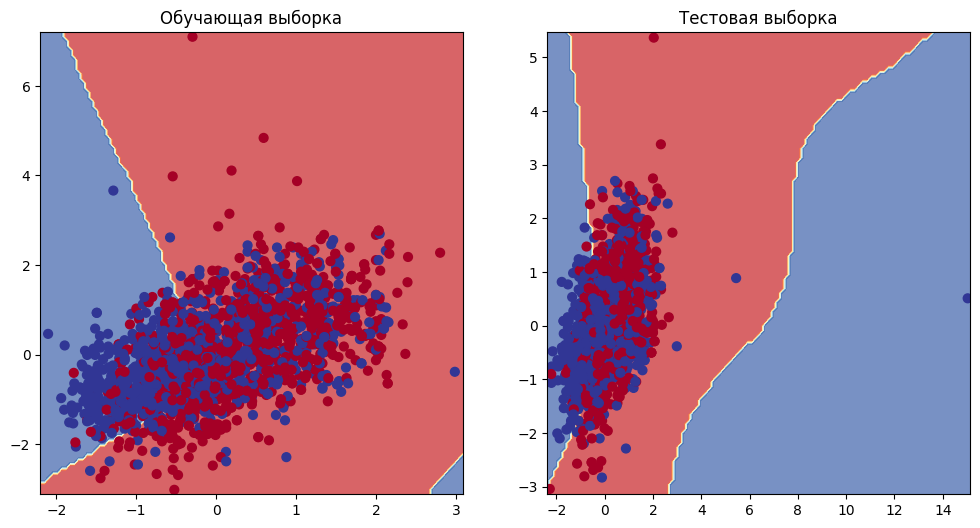

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Обучающая выборка")
plot_decision_boundary(model1, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Тестовая выборка")
plot_decision_boundary(model1, X=X_test, y=y_test)

Граница решения для построенного классификатора c оптимизатором **Adamax**

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


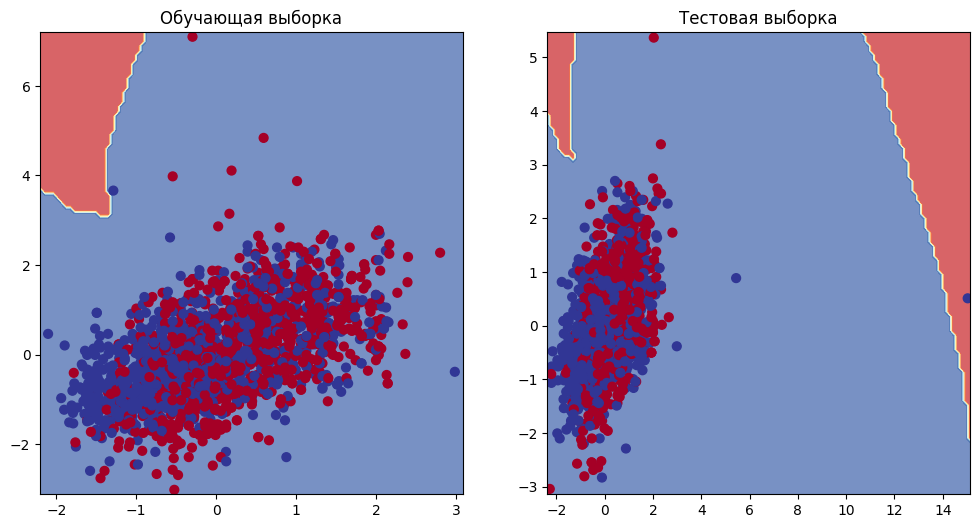

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Обучающая выборка")
plot_decision_boundary(model2, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Тестовая выборка")
plot_decision_boundary(model2, X=X_test, y=y_test)

Граница решения для построенного классификатора c оптимизатором **SGD**

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


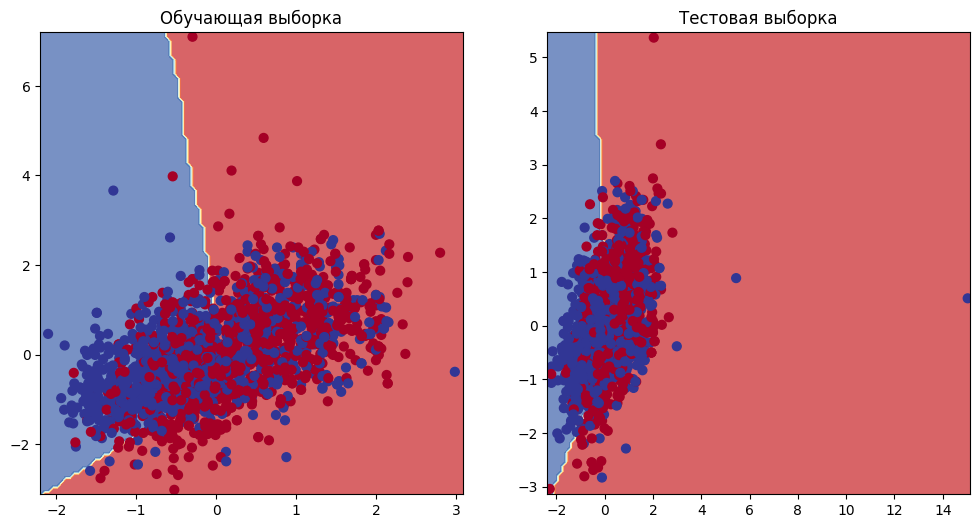

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Обучающая выборка")
plot_decision_boundary(model3, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Тестовая выборка")
plot_decision_boundary(model3, X=X_test, y=y_test)

## **Задача 6**

### Визуализация ROC-кривых

In [ ]:
def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

In [ ]:
def roc_from_scratch(probabilities, y_test, partitions=100):
    roc = np.array([])
    for i in range(partitions + 1):

        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])

    return roc.reshape(-1, 2)

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


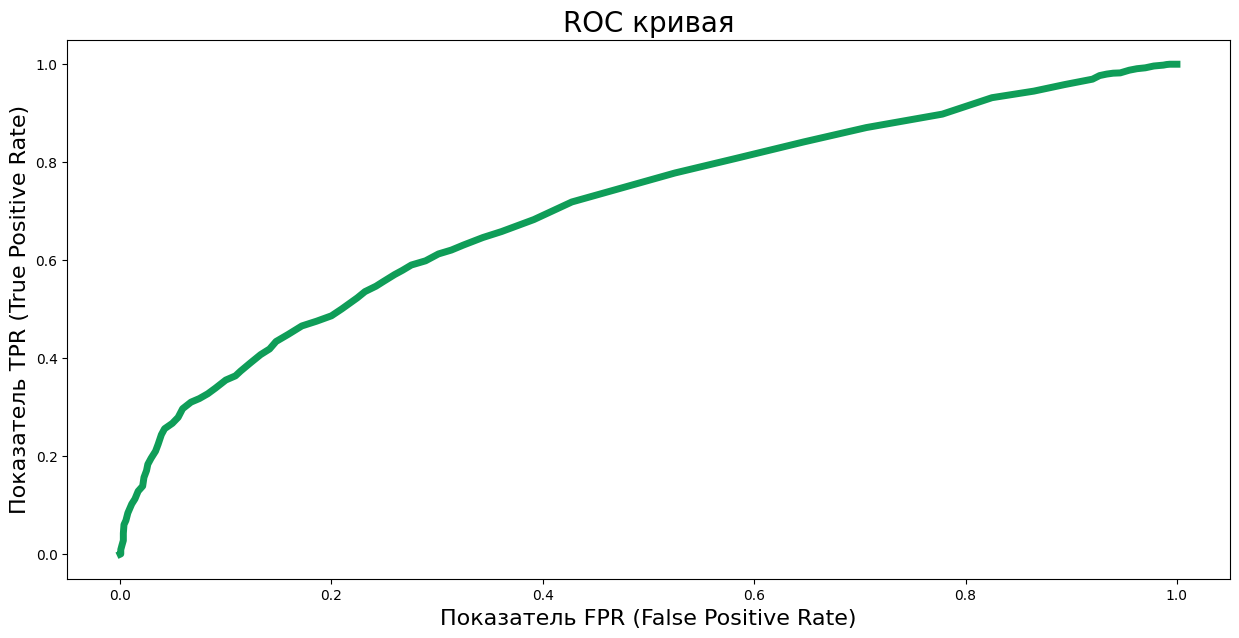

In [ ]:
plt.figure(figsize=(15,7))
pred1 = model1.predict(X)
ROC = roc_from_scratch(pred1.reshape(-1),y,partitions=100)
#plt.scatter(ROC[:,0],ROC[:,1],color='#0F9D58',s=100)
plt.plot(ROC[:,0],ROC[:,1],color='#0F9D58',lw=5)
plt.title('ROC кривая',fontsize=20)
plt.xlabel('Показатель FPR (False Positive Rate)',fontsize=16)
plt.ylabel('Показатель TPR (True Positive Rate)',fontsize=16);

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


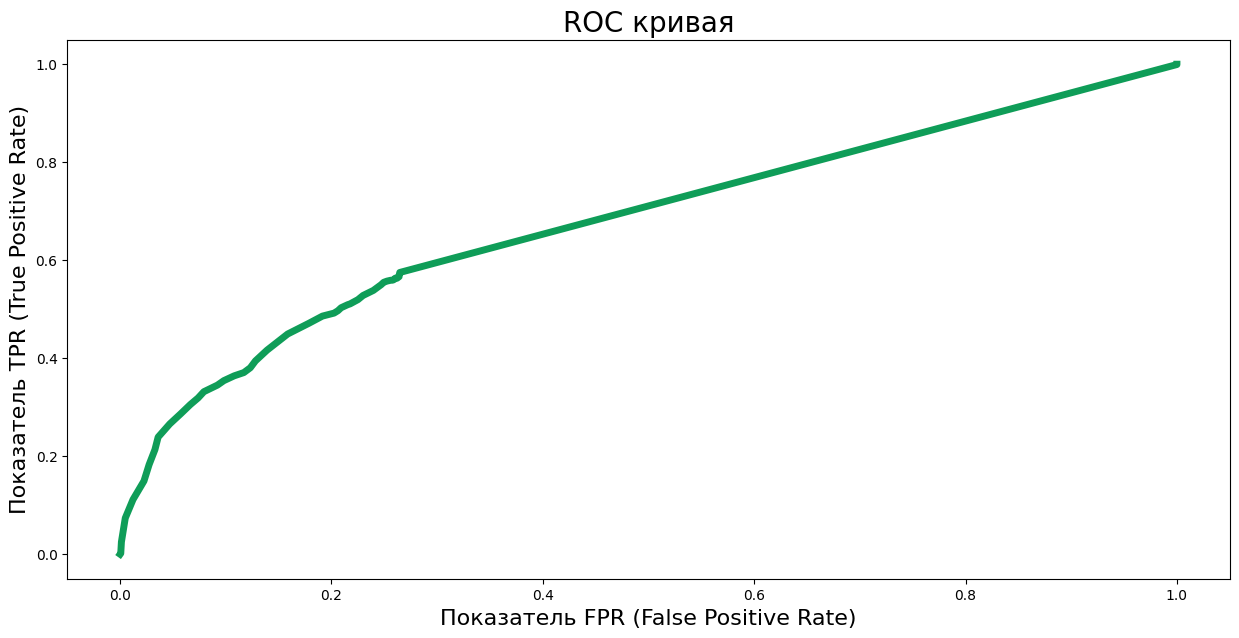

In [ ]:
plt.figure(figsize=(15,7))
pred2 = model2.predict(X)
ROC = roc_from_scratch(pred2.reshape(-1),y,partitions=100)
#plt.scatter(ROC[:,0],ROC[:,1],color='#0F9D58',s=100)
plt.plot(ROC[:,0],ROC[:,1],color='#0F9D58',lw=5)
plt.title('ROC кривая',fontsize=20)
plt.xlabel('Показатель FPR (False Positive Rate)',fontsize=16)
plt.ylabel('Показатель TPR (True Positive Rate)',fontsize=16);

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


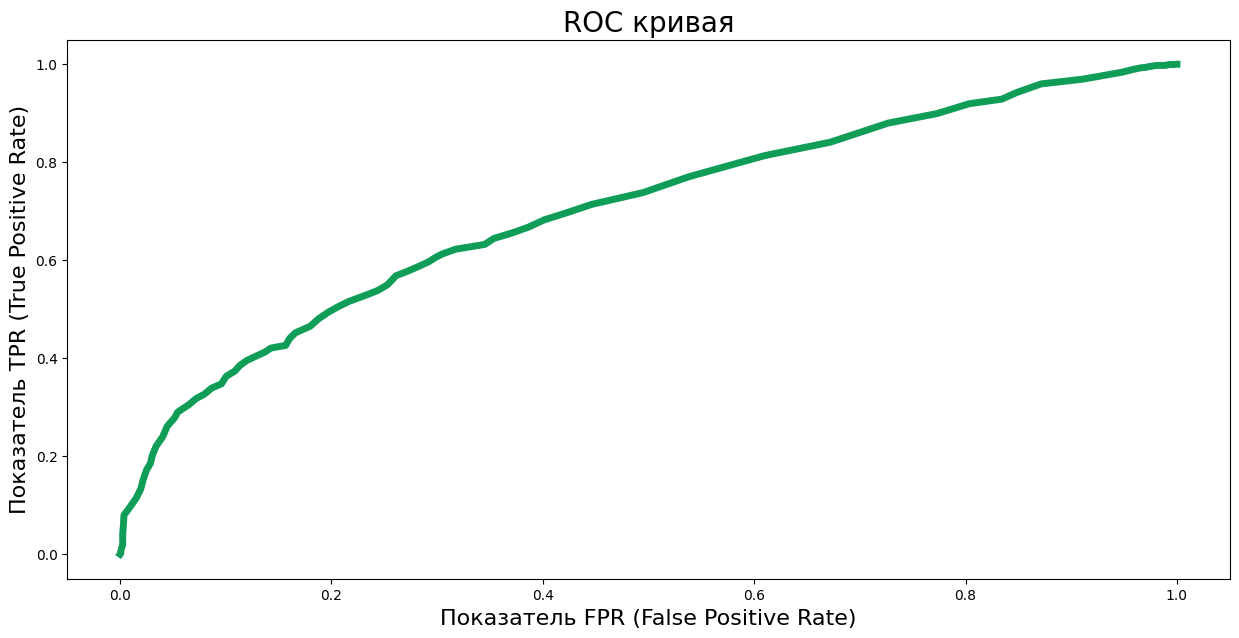

In [ ]:
plt.figure(figsize=(15,7))
pred3 = model3.predict(X)
ROC = roc_from_scratch(pred3.reshape(-1),y,partitions=100)
#plt.scatter(ROC[:,0],ROC[:,1],color='#0F9D58',s=100)
plt.plot(ROC[:,0],ROC[:,1],color='#0F9D58',lw=5)
plt.title('ROC кривая',fontsize=20)
plt.xlabel('Показатель FPR (False Positive Rate)',fontsize=16)
plt.ylabel('Показатель TPR (True Positive Rate)',fontsize=16);

### Визуализация обучения модели

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

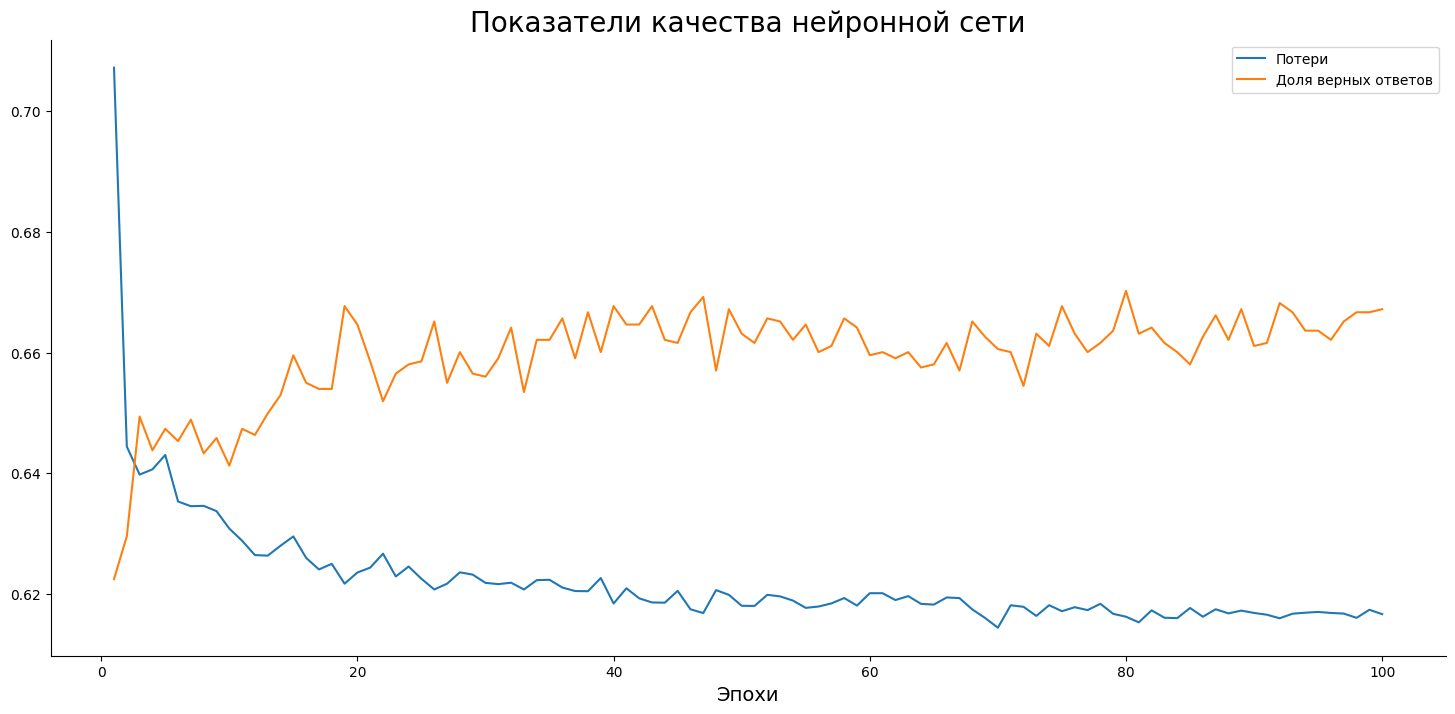

In [ ]:
plt.plot(np.arange(1, 101), history1.history['loss'], label='Потери')
plt.plot(np.arange(1, 101), history1.history['accuracy'], label='Доля верных ответов')
plt.title('Показатели качества нейронной сети', size=20)
plt.xlabel('Эпохи', size=14)
plt.legend();

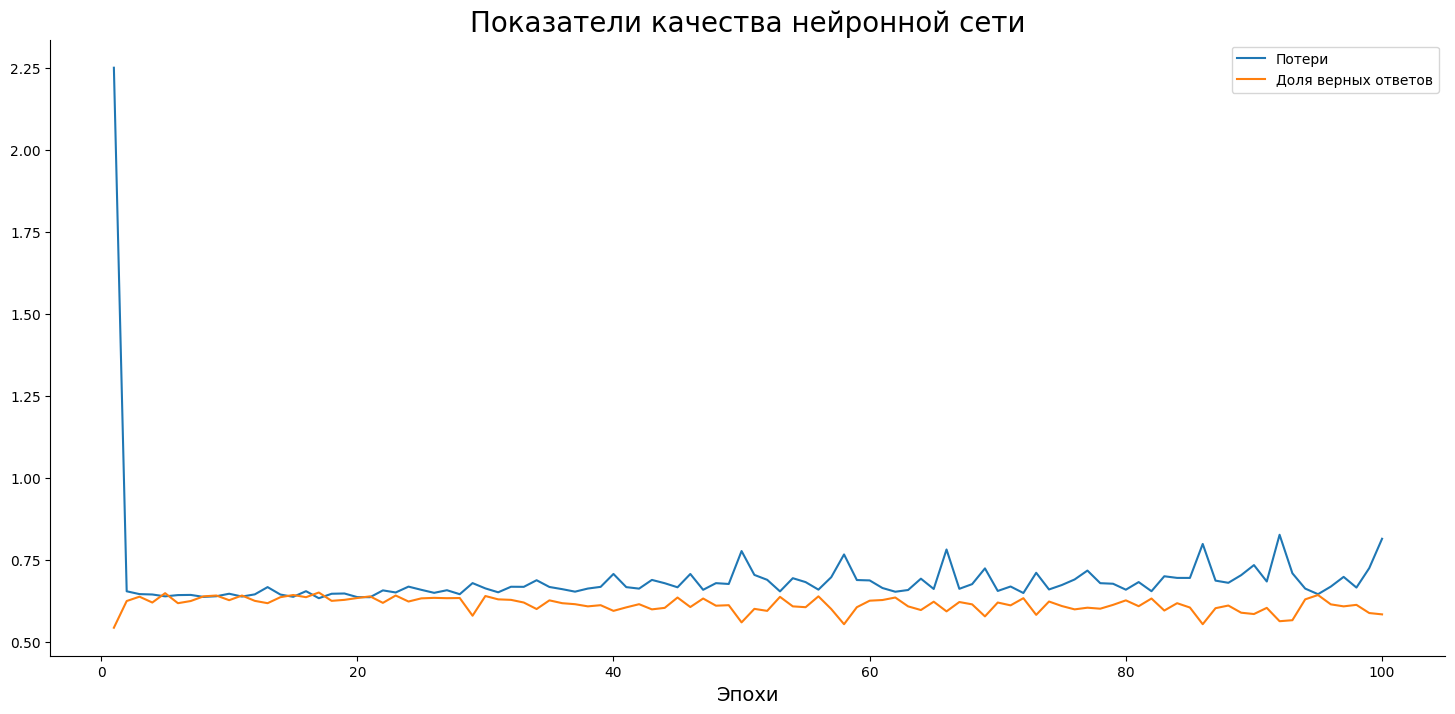

In [ ]:
plt.plot(np.arange(1, 101), history2.history['loss'], label='Потери')
plt.plot(np.arange(1, 101), history2.history['accuracy'], label='Доля верных ответов')
plt.title('Показатели качества нейронной сети', size=20)
plt.xlabel('Эпохи', size=14)
plt.legend();

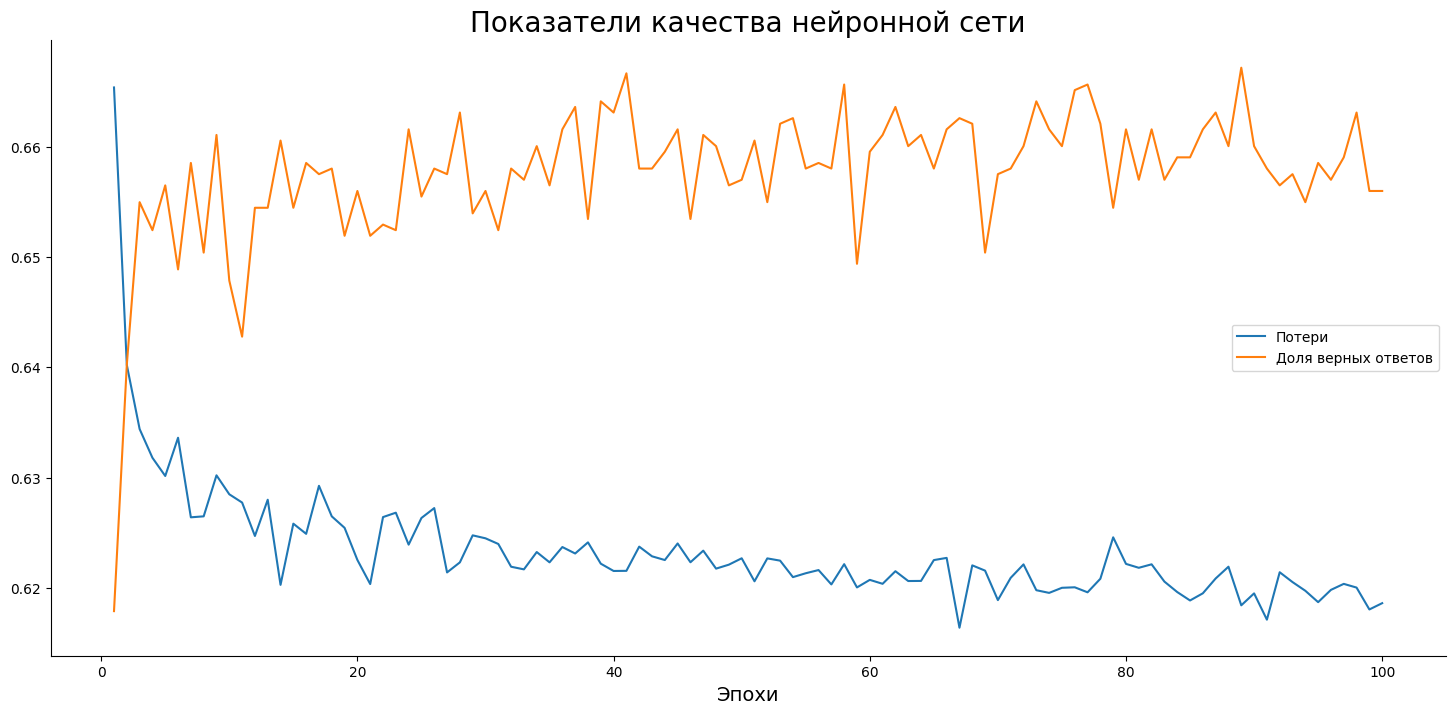

In [ ]:
plt.plot(np.arange(1, 101), history3.history['loss'], label='Потери')
plt.plot(np.arange(1, 101), history3.history['accuracy'], label='Доля верных ответов')
plt.title('Показатели качества нейронной сети', size=20)
plt.xlabel('Эпохи', size=14)
plt.legend();

## **Задача 7**

Определим в исходном наборе данных признак (отличный от двух независимых признаков), принимающий непрерывные значения и **имеющий максимальную дисперсию**

In [ ]:
var = df.drop(columns=['features/total sulfur dioxide', 'features/density']).var()

max_var = np.max(var)

COL = list(var.index)

print("FEATURE WITH MAXIMAL VARIANCE")
for col in COL:
  if var[col] == max_var:
    print("'", col, "' has maximal variance: ", max_var, sep='')


FEATURE WITH MAXIMAL VARIANCE
'features/free sulfur dioxide' has maximal variance: 289.2425842285156


## **Задача 8**

Визуализируем точки набора данных в трехмерном пространстве с координатами, соответствующими трем независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.

Стандартизуем третий независимый признак **'features/free sulfur dioxide'**

In [ ]:
x3 = df['features/free sulfur dioxide'].to_numpy()

x3 = (x3 - np.mean(x3))/np.std(x3)


np.mean(x3), np.std(x3)

(np.float32(-8.7228685e-08), np.float32(0.99999994))

In [ ]:
df4 = pd.DataFrame()
df4['density'] = df2['density']
df4['total sulfur dioxide'] = df2['total sulfur dioxide']
df4['free sulfur dioxide'] = x3
df4['quality'] = df2['top quality']

df4.shape

(4898, 4)

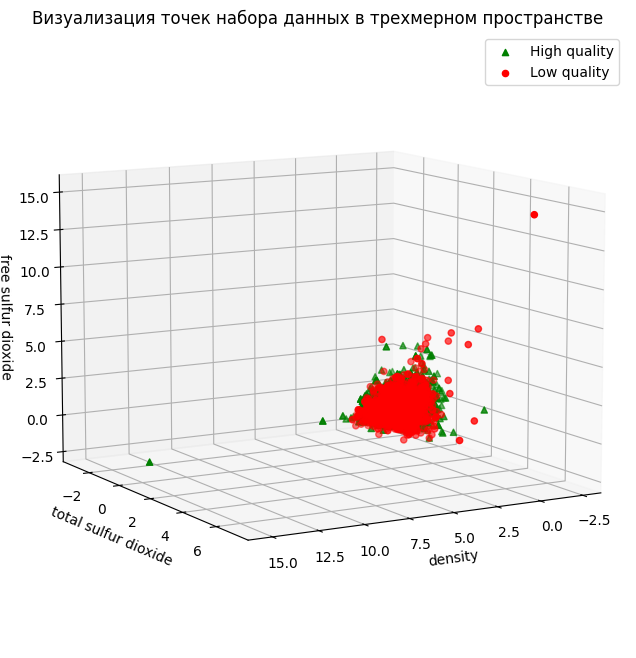

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter( df4['density'][df4['quality'] == 1], df4['total sulfur dioxide'][df4['quality'] == 1], df4['free sulfur dioxide'][df4['quality'] == 1], c='g', marker='^', label='High quality')
ax.scatter( df4['density'][df4['quality'] == 0], df4['total sulfur dioxide'][df4['quality'] == 0], df4['free sulfur dioxide'][df4['quality'] == 0], c='r', marker='o', label='Low quality')
ax.set_xlabel('density', fontsize=10)
ax.set_ylabel('total sulfur dioxide', fontsize=10)
ax.set_zlabel('free sulfur dioxide', fontsize=10)
ax.set_title("Визуализация точек набора данных в трехмерном пространстве", fontsize=12)

ax.view_init(elev = 10, azim = 60)
ax.legend()
plt.show()

## **Задача 9**

Разбираем исходный набор данных на обучающую и тестовую выборки. Постройте нейронную сеть для многоклассовой классификации с нормализующим слоем и параметрами, соответствующими лучшей нейронной сети для бинарной классифиации из п.4, и обучите ее на обучающей выборке, контролируя процесс ее обучения.

In [ ]:
X = np.array(df.drop('quality', axis=1))
y = np.array(df['quality'])

In [ ]:
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X, to_categorical(y),
    test_ratio=0.4
)

X_train.shape, y_train.shape


((2939, 11), (2939, 10))

In [ ]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X.shape[1],))
feature_normalizer.adapt(X_train)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(64, activation='selu'),
    tf.keras.layers.Dense(64, activation='selu'),
    tf.keras.layers.Dense(64, activation='selu'),
    tf.keras.layers.Dense(64, activation='selu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])


model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adamax(learning_rate=0.1),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    # уровень выводимой информации
                    verbose=1,
                    # проверка (валидация) на 20% обучающих данных
                    validation_split = 0.4)

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7798 - loss: 2.5274 - val_accuracy: 0.8947 - val_loss: 0.2312
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8973 - loss: 0.2182 - val_accuracy: 0.9000 - val_loss: 0.2330
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8959 - loss: 0.2159 - val_accuracy: 0.8964 - val_loss: 0.2149
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8949 - loss: 0.2102 - val_accuracy: 0.8999 - val_loss: 0.2126
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8971 - loss: 0.2118 - val_accuracy: 0.8952 - val_loss: 0.2138
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8888 - loss: 0.2244 - val_accuracy: 0.8947 - val_loss: 0.2264
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8966 - loss: 0.2158 - val_accuracy: 0.8999 - val_loss: 0.2251
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8943 - loss: 0.2176 - val_accuracy: 0.8968 - v

## **Задача 10**

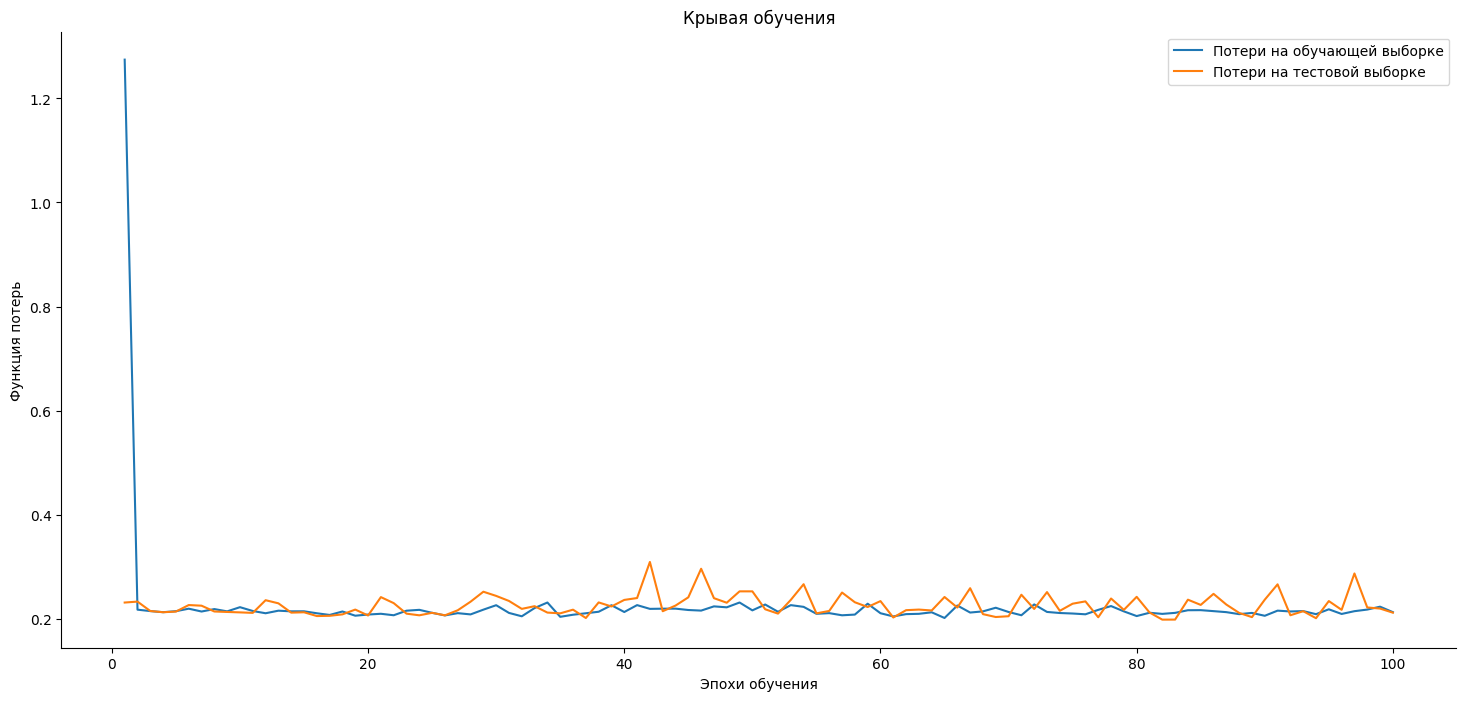

In [ ]:
epochs = range(1, len(history.history["loss"]) + 1)
plt.plot(epochs, history.history["loss"],  label="Потери на обучающей выборке")
plt.plot(epochs, history.history["val_loss"], label="Потери на тестовой выборке")
plt.title("Крывая обучения")
plt.xlabel("Эпохи обучения")
plt.ylabel("Функция потерь")
plt.legend();